In [1]:
#Leemos el Notebook de Utils
#We read the Utils Notebook
%run Utils.ipynb
plt.style.use('fivethirtyeight')

C:\Users\manub\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
path = "C:\\Users\\manub\\DATA\\00-EXTERNO\\MANU\\PHD\\WALKNET\\"

In [3]:
final_registers_file = path+"MADRID\\CAT_referenciado.csv"
parcels_file = path+"MADRID\\28_900_UA_2020-07-31_SHF\\PARCELA\\PARCELAII.shp"


final_network_points_file = path+"\\MADRID\\RED_nodos.csv"
cityname = 'MADRID'
codes = path+"00_CATASTRO_DOCUMENTACION\\CODIGOS_CDD.xlsx"

In [4]:
registers = pd.read_csv(final_registers_file)
nodes = pd.read_csv(final_network_points_file)
parcels = gpd.read_file(parcels_file)[['REFCAT','AREA','geometry']]

In [5]:
#display(registers.head(50))
#display(parcels.head())

# Prepare land use codes
I used the description found [here](http://www.catastro.minhap.es/documentos/preguntas_frecuentes_formato_CAT.pdf) in order to reclassify to make sense for my further application of Trip Generation Rates

In [6]:
df_codes = pd.read_excel(codes, index_col=0)
display(df_codes)

df_codes1 = pd.Series(df_codes.CLASS1.values,index=df_codes.COD14).to_dict()
registers['CDDT1'] = registers['CDD'].map(df_codes1)
df_codes2 = pd.Series(df_codes.CLASS2.values,index=df_codes.COD14).to_dict()
registers['CDDT2'] = registers['CDD'].map(df_codes2)

,COD14,DESC,CLASS1,CLASS1D,CLASS2,CLASS2D,ITEU,ITER
COD15,,,,,,,,
V,V,Sin uso detallado,C1,Vivienda,C1,Vivienda,UNID,1.000000
R,R,Religioso,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RBS,Basílica,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RCP,Capilla,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RCT,Catedral,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RER,Ermita,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RPR,Parroquia,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RSN,Santuario,C10,NaN,C10,Equipamiento Religioso Genérico,EDIF,0.051150
R,RCM,Cementerio,C10,NaN,C101,Cementerio,PARCE,3.400000


# Preparing data aggregation

I will aggregate results to city unit for data visualization, to parcels for spatial visualization, and to network points for centrality calculation

In [7]:
city_agg = ['CDDT']
parcel_agg = ['PCAT','CDDT']
network_agg = ['netpoint','CDDT']

Aggregate by city

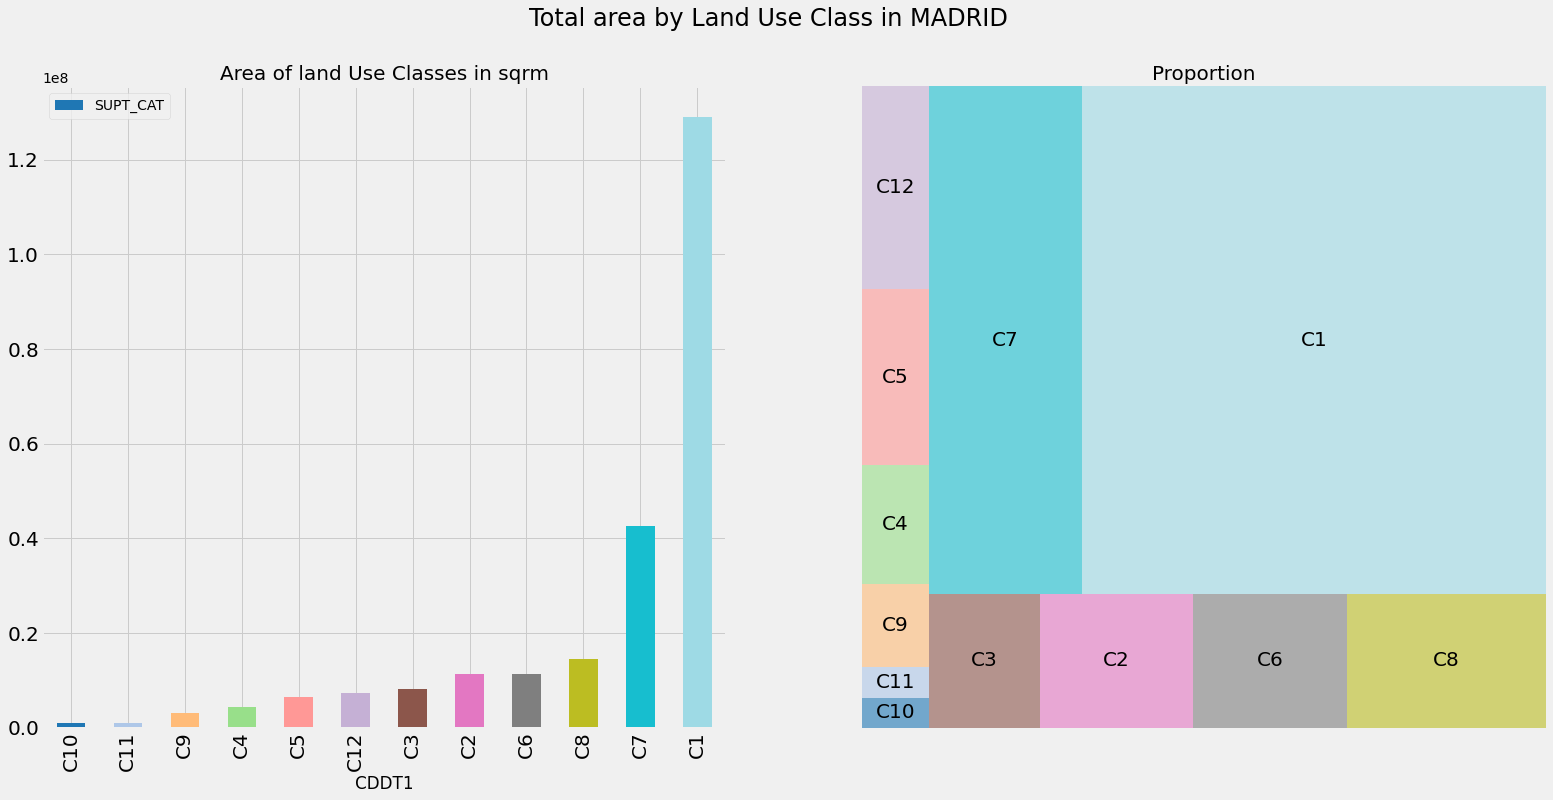

In [8]:
viz_totals(registers,'CDDT1','SUPT_CAT',cityname)

Aggregate by parcel and netpoint. First, land use classes aggregated by gross area. Then, classes aggregated by number of units. Finally, classes aggregated by parcel area

In [9]:
#Parcels
dfs_parcels = registers.groupby(['PCAT','CDDT2'])['SUPT_CAT'].sum().unstack('CDDT2',fill_value=0).add_prefix('S').reset_index()
dfn_parcels = registers.groupby(['PCAT','NCBI_PC','CDD_BI']).count().reset_index()[['PCAT','NCBI_PC','CDD_BI']]
df_codes3 = pd.Series(df_codes.CLASS1.values,index=df_codes.COD14).to_dict()
dfn_parcels['CDDT1'] = dfn_parcels['CDD_BI'].map(df_codes3)
dfn_parcels = dfn_parcels[['PCAT','CDDT1']]
dfn_parcels = dfn_parcels.groupby(['PCAT','CDDT1'])['CDDT1'].count().unstack('CDDT1',fill_value=0).add_prefix('N').reset_index()
df_parcels = pd.merge(dfn_parcels,dfs_parcels,how='right',on='PCAT').fillna(0)
#Network nodes
dfs_nodes = registers.groupby(['netpoint','CDDT2'])['SUPT_CAT'].sum().unstack('CDDT2',fill_value=0).add_prefix('S').reset_index()
dfn_nodes = registers.groupby(['netpoint','PCAT','NCBI_PC','CDD_BI']).count().reset_index()[['netpoint','PCAT','NCBI_PC','CDD_BI']]
df_codes3 = pd.Series(df_codes.CLASS1.values,index=df_codes.COD14).to_dict()
dfn_nodes['CDDT1'] = dfn_nodes['CDD_BI'].map(df_codes3)
dfn_nodes = dfn_nodes[['netpoint','CDDT1']]
dfn_nodes = dfn_nodes.groupby(['netpoint','CDDT1'])['CDDT1'].count().unstack('CDDT1',fill_value=0).add_prefix('N').reset_index()
df_nodes = pd.merge(dfn_nodes,dfs_nodes,how='right',on='netpoint').fillna(0)

In [10]:
parcels = pd.merge(parcels,df_parcels,how = 'left',left_on = 'REFCAT',right_on='PCAT')

In [11]:
nodes = pd.merge(nodes,df_nodes,how = 'left',on = 'netpoint')

In [12]:
fillcols = list(parcels.drop(columns='geometry').columns)
parcels[fillcols] = parcels[fillcols].fillna(0)
fillcols = list(nodes.drop(columns='geometry').columns)
nodes[fillcols] = nodes[fillcols].fillna(0)

In [13]:
parcels.to_csv(path+"MADRID\\parcels_loaded.csv")
nodes.to_csv(path+"MADRID\\nodes_loaded.csv")

iterates = pd.Series(df_codes.ITER.values,index=df_codes.CLASS2).to_dict()
parcels = apply_rates(parcels,iterates,'C1')
iterates = pd.Series(df_codes.ITER.values,index=df_codes.CLASS2).to_dict()
nodes = apply_rates(nodes,iterates,'C1')

parcels.to_file(path+"\\ZARAGOZA\\parcels_loaded.shp",driver = 'ESRI Shapefile')
nodes['geometry'] = nodes['geometry'].apply(loads)
nodes = gpd.GeoDataFrame(nodes,geometry='geometry')
nodes.to_file(path+"\\ZARAGOZA\\nodes_loaded.shp",driver = 'ESRI Shapefile')

In [ ]:
#AQUI LO SUYO SERIA CLASIFICAR POR TIPOS DE PROXIMIDAD Y BUSCAR OUTLIERS